<b>Problem Statement:</b> How do the properties of a car impact it's fuel efficiency?

How does the number of cylinders, displacement, horsepower, weight, acceleration, and modelyear affect a car's fuel efficiency?

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
cars = pd.read_table('auto-mpg.data', delim_whitespace=True, names=columns)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [79]:
cars['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14     95.00
15     95.00
16     97.00
17     85.00
18     88.00
19     46.00
20     87.00
21     90.00
22     95.00
23     113.0
24     90.00
25     215.0
26     200.0
27     210.0
28     193.0
29     88.00
       ...  
368    88.00
369    88.00
370    85.00
371    84.00
372    90.00
373    92.00
374        ?
375    74.00
376    68.00
377    68.00
378    63.00
379    70.00
380    88.00
381    75.00
382    70.00
383    67.00
384    67.00
385    67.00
386    110.0
387    85.00
388    92.00
389    112.0
390    96.00
391    84.00
392    90.00
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, dtype: object

Pandas Plot (checking some correlation is there or not b/w mpg,weight and acceleartion with pandas scatter plot)

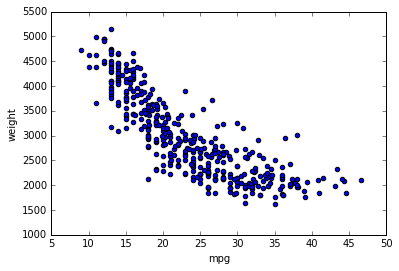

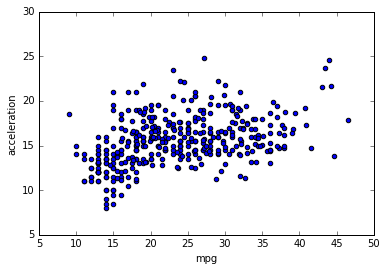

In [80]:
cars.plot(x='mpg',y='weight', kind = 'scatter')
cars.plot(x='mpg',y='acceleration', kind = 'scatter')

(same with matplotlib)
strong negative linear relationship between the weight and mpg columns and a weak, positive linear relationship between the acceleration and mpg columns.

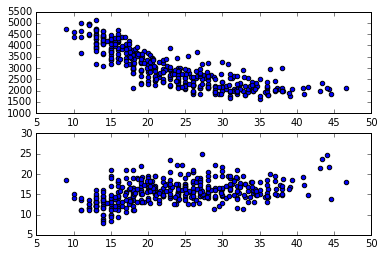

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(cars['mpg'], cars['weight'])
ax2.scatter(cars['mpg'], cars['acceleration'])

Applying Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[['weight']], cars['mpg'])
predictions = lr.predict(cars[['weight']])
print(predictions[0:5])

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]


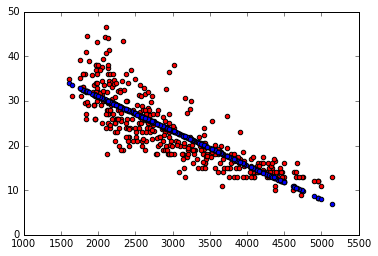

In [83]:
plt.scatter(cars['weight'],cars['mpg'],c='red')
plt.scatter(cars['weight'],predictions, c='blue')

Error metrics

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars["mpg"],predictions)
print('mse:',mse, 'rmse:',mse**0.5)

('mse:', 18.780939734628394, 'rmse:', 4.3336981591509574)


Data clean: Remove '?' rows in horsepower column

/projects/sage/sage-7.5/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


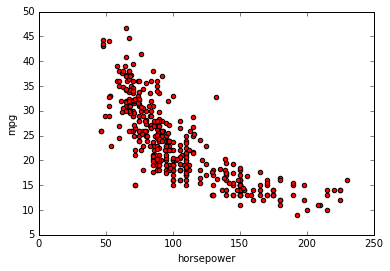

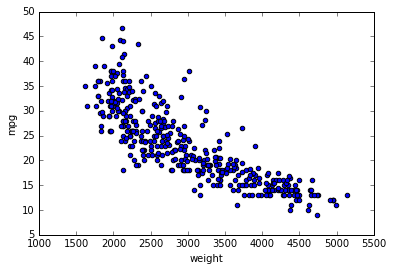

In [87]:
filtered_cars = cars[cars['horsepower']!='?']
#or
#cars['horsepower'] = pd.to_numeric(cars['horsepower'],errors='coerce')
#cars = cars.dropna(axis=0)
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype(float)

filtered_cars.plot('horsepower','mpg',kind='scatter', c='red')
filtered_cars.plot('weight','mpg',kind='scatter',c='blue')

In [88]:
lr.fit(filtered_cars[['horsepower']], filtered_cars["mpg"])
predictions = lr.predict(filtered_cars[['horsepower']])
print(predictions[0:5],filtered_cars['mpg'][0:5])

(array([ 19.41604569,  13.89148002,  16.25915102,  16.25915102,  17.83759835]), 0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64)


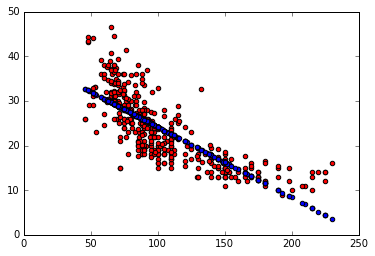

In [89]:
plt.scatter(filtered_cars['horsepower'],filtered_cars['mpg'],c='red')
plt.scatter(filtered_cars['horsepower'],predictions,c='blue')

In [90]:
mse = mean_squared_error(filtered_cars['mpg'],predictions)
rmse = mse**0.5
print(mse,rmse)

(23.943662938603108, 4.8932262300657126)
